<a href="https://colab.research.google.com/github/Shiva-kalyanaram/-Singapore-Resale-Flat-Prices-ML-Predicting/blob/main/Singapore.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#model selection to converting categorical data for feature selection
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import LabelEncoder

#models
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.ensemble import GradientBoostingRegressor
from lightgbm import LGBMRegressor
from xgboost import XGBRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.model_selection import train_test_split

In [ ]:
# As we get the data in different dataframes, we need to merge them all.

In [ ]:
# df = pd.read_csv('/content/ResaleFlatPricesBasedonApprovalDate19901999.csv')
# df1 = pd.read_csv('/content/ResaleFlatPricesBasedonApprovalDate2000Feb2012.csv')
# df2 = pd.read_csv('/content/ResaleFlatPricesBasedonRegistrationDateFromJan2015toDec2016.csv')
# df3 = pd.read_csv('/content/ResaleFlatPricesBasedonRegistrationDateFromMar2012toDec2014.csv')
# df4 = pd.read_csv('/content/ResaleflatpricesbasedonregistrationdatefromJan2017onwards.csv')

# df

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,resale_price
0,1990-01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,10 TO 12,31.0,IMPROVED,1977,9000
1,1990-01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,04 TO 06,31.0,IMPROVED,1977,6000
2,1990-01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,10 TO 12,31.0,IMPROVED,1977,8000
3,1990-01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,07 TO 09,31.0,IMPROVED,1977,6000
4,1990-01,ANG MO KIO,3 ROOM,216,ANG MO KIO AVE 1,04 TO 06,73.0,NEW GENERATION,1976,47200
...,...,...,...,...,...,...,...,...,...,...
287191,1999-12,YISHUN,EXECUTIVE,611,YISHUN ST 61,10 TO 12,142.0,APARTMENT,1987,456000
287192,1999-12,YISHUN,EXECUTIVE,324,YISHUN CTRL,01 TO 03,142.0,APARTMENT,1988,408000
287193,1999-12,YISHUN,EXECUTIVE,392,YISHUN AVE 6,07 TO 09,146.0,MAISONETTE,1988,469000
287194,1999-12,YISHUN,EXECUTIVE,356,YISHUN RING RD,04 TO 06,146.0,MAISONETTE,1988,440000


In [ ]:
#joining all the dataframes into one for better view since we need to have the data till now.

In [ ]:
# df_all = pd.concat([df,df1, df2,df3,df4],ignore_index=True)
# df_all

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,resale_price,remaining_lease
0,1990-01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,10 TO 12,31.0,IMPROVED,1977,9000.0,NaN
1,1990-01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,04 TO 06,31.0,IMPROVED,1977,6000.0,NaN
2,1990-01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,10 TO 12,31.0,IMPROVED,1977,8000.0,NaN
3,1990-01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,07 TO 09,31.0,IMPROVED,1977,6000.0,NaN
4,1990-01,ANG MO KIO,3 ROOM,216,ANG MO KIO AVE 1,04 TO 06,73.0,NEW GENERATION,1976,47200.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...
914067,2023-12,YISHUN,5 ROOM,334C,YISHUN ST 31,13 TO 15,112.0,Improved,2015,650000.0,91 years 01 month
914068,2023-12,YISHUN,EXECUTIVE,328,YISHUN RING RD,07 TO 09,142.0,Apartment,1988,798000.0,63 years 07 months
914069,2023-12,YISHUN,EXECUTIVE,606,YISHUN ST 61,07 TO 09,142.0,Apartment,1987,788888.0,63 years 01 month
914070,2023-12,YISHUN,EXECUTIVE,643,YISHUN ST 61,10 TO 12,146.0,Maisonette,1987,838000.0,62 years 10 months


In [ ]:
df_all.to_csv('df_all', index = False)

In [ ]:
df_all = pd.read_csv('/content/df_all (1)')
df_all

<ipython-input-136-aaaf07a6e993>:1: DtypeWarning: Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.
  df_all = pd.read_csv('/content/df_all (1)')


,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,resale_price,remaining_lease
0,1990-01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,10 TO 12,31.0,IMPROVED,1977,9000.0,NaN
1,1990-01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,04 TO 06,31.0,IMPROVED,1977,6000.0,NaN
2,1990-01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,10 TO 12,31.0,IMPROVED,1977,8000.0,NaN
3,1990-01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,07 TO 09,31.0,IMPROVED,1977,6000.0,NaN
4,1990-01,ANG MO KIO,3 ROOM,216,ANG MO KIO AVE 1,04 TO 06,73.0,NEW GENERATION,1976,47200.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...
914067,2023-12,YISHUN,5 ROOM,334C,YISHUN ST 31,13 TO 15,112.0,Improved,2015,650000.0,91 years 01 month
914068,2023-12,YISHUN,EXECUTIVE,328,YISHUN RING RD,07 TO 09,142.0,Apartment,1988,798000.0,63 years 07 months
914069,2023-12,YISHUN,EXECUTIVE,606,YISHUN ST 61,07 TO 09,142.0,Apartment,1987,788888.0,63 years 01 month
914070,2023-12,YISHUN,EXECUTIVE,643,YISHUN ST 61,10 TO 12,146.0,Maisonette,1987,838000.0,62 years 10 months


**Data Preprocessing**

In [ ]:
df_all.isnull().sum() #finding null and handling Null values Also, changing the dtypes to exact form

month                       0
town                        0
flat_type                   0
block                       0
street_name                 0
storey_range                0
floor_area_sqm              0
flat_model                  0
lease_commence_date         0
resale_price                0
remaining_lease        709050
dtype: int64

In [ ]:
df_all['lease_commence_date']=pd.to_datetime(df_all['lease_commence_date'], format = '%Y')
df_all['month']=pd.to_datetime(df_all['month'])

In [ ]:
df_all['lease_commence_date'].head()

0   1977-01-01
1   1977-01-01
2   1977-01-01
3   1977-01-01
4   1976-01-01
Name: lease_commence_date, dtype: datetime64[ns]

In [ ]:
# As the overall due is 99 years in Singapore, we can find the remaining lease from the lease starting year by below format.

In [ ]:
df_all['end_of_lease'] = df_all['lease_commence_date'] + pd.DateOffset(years=99)

In [ ]:
# df_all['lease_remain_years'] = 99 - (2023 - df_all['lease_commence_date'])
df_all.head()

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,resale_price,remaining_lease,end_of_lease
0,1990-01-01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,10 TO 12,31.0,IMPROVED,1977-01-01,9000.0,NaN,2076-01-01
1,1990-01-01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,04 TO 06,31.0,IMPROVED,1977-01-01,6000.0,NaN,2076-01-01
2,1990-01-01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,10 TO 12,31.0,IMPROVED,1977-01-01,8000.0,NaN,2076-01-01
3,1990-01-01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,07 TO 09,31.0,IMPROVED,1977-01-01,6000.0,NaN,2076-01-01
4,1990-01-01,ANG MO KIO,3 ROOM,216,ANG MO KIO AVE 1,04 TO 06,73.0,NEW GENERATION,1976-01-01,47200.0,NaN,2075-01-01


In [ ]:
df_all['end_of_lease']= pd.to_datetime(df_all['end_of_lease'])

In [ ]:

# #removing the unnecessary columns as we get the lease start and end year.
df_all.drop('remaining_lease', axis= 1, inplace = True)
# df_all.drop('lease_remain_years', axis = 1, inplace = True)

#dropping the the columns which have Null values

In [ ]:
df_all.dtypes

month                  datetime64[ns]
town                           object
flat_type                      object
block                          object
street_name                    object
storey_range                   object
floor_area_sqm                float64
flat_model                     object
lease_commence_date    datetime64[ns]
resale_price                  float64
end_of_lease           datetime64[ns]
dtype: object

In [ ]:
df_all['flat_type'].value_counts()

4 ROOM              346729
3 ROOM              292761
5 ROOM              192444
EXECUTIVE            68851
2 ROOM               11449
1 ROOM                1300
Multi Generation       538
Name: flat_type, dtype: int64

In [ ]:
replace_flat = {'MULTI GENERATION' : 'Multi Generation', 'MULTI-GENERATION': 'Multi Generation'}
df_all['flat_type']=df_all['flat_type'].replace(map_flat)

In [ ]:
len(df_all['flat_model'].unique())

15

In [ ]:
flat_model_mapping = {
    'IMPROVED': 'IMPROVED',
    'NEW GENERATION': 'NEW GENERATION',
    'New Generation': 'NEW GENERATION',
    'Improved': 'IMPROVED',
    'MODEL A': 'MODEL A, A2 & MODEL A-MAISONETTE',
    'Model A': 'MODEL A, A2 & MODEL A-MAISONETTE',
    'STANDARD': 'STANDARD & SIMPLIFIED',
    'SIMPLIFIED': 'STANDARD & SIMPLIFIED',
    'Simplified': 'STANDARD & SIMPLIFIED',
    'MODEL A-MAISONETTE': 'MODEL A, A2 & MODEL A-MAISONETTE',
    'APARTMENT': 'Others',
    'MAISONETTE': 'MODEL A, A2 & MODEL A-MAISONETTE',
    'TERRACE': 'Others',
    '2-ROOM': 'Others',
    'IMPROVED-MAISONETTE': 'MODEL A, A2 & MODEL A-MAISONETTE',
    'Improved-Maisonette': 'MODEL A, A2 & MODEL A-MAISONETTE',
    'Premium Maisonette':'MODEL A, A2 & MODEL A-MAISONETTE',
    'Model A2': 'MODEL A, A2 & MODEL A-MAISONETTE',
    'MULTI GENERATION': 'Others',
    'PREMIUM APARTMENT': 'Premium Apartment',
    'Premium Apartment Loft': 'Premium Apartment',
    'Type S1': 'Type S1, S2',
    'Type S2': 'Type S1, S2',
    '2-room' : 'Others',
    '3Gen': 'Others'
}

df_all['flat_model']=df_all['flat_model'].replace(flat_model_mapping)

In [ ]:
df_all.nunique()

month                   408
town                     27
flat_type                 8
block                  2696
street_name             584
storey_range             25
floor_area_sqm          210
flat_model               15
lease_commence_date      56
resale_price           9340
lease_end_year           56
dtype: int64

**EDA process**

In [ ]:
df_all.columns

Index(['month', 'town', 'flat_type', 'block', 'street_name', 'storey_range',
       'floor_area_sqm', 'flat_model', 'lease_commence_date', 'resale_price',
       'lease_remain_years'],
      dtype='object')

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

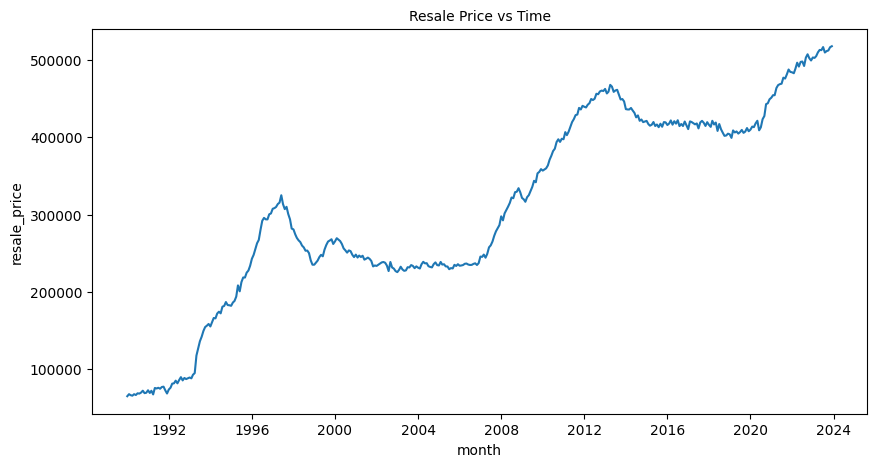

In [ ]:
plt.figure(figsize=(10,5))

sns.lineplot(x = df_all['month'], y = df_all['resale_price'], errorbar=None)

# Generate title and labels.
plt.title('Resale Price vs Time', fontsize=10)

# Enlarge tick marks.
plt.yticks(fontsize=10)
plt.xticks(fontsize=10);

**Observations**

It clearly shows that the resale prices on singapore getting increase after the covid period arround 2019, while there was a slight drop during pandemic like other countries.

In this I have used sns.lineplot to visualize the month and resale_price flow.
Syntax: seaborn.lineplot(x=None, y=None, hue=None, style=None, data=None, markers=True, dashes=True, estimator='mean', ci=95, n_boot=1000, units=None, seed=None, sort=True, err_style='band', err_kws=None, legend='auto', ax=None, **kwargs)

Usage:Line plots are useful for visualizing trends and patterns in time-series or continuous data, making them an essential tool in Exploratory Data Analysis (EDA).

<Axes: title={'center': 'Histogram: Housing Demands'}, xlabel='month', ylabel='Count'>

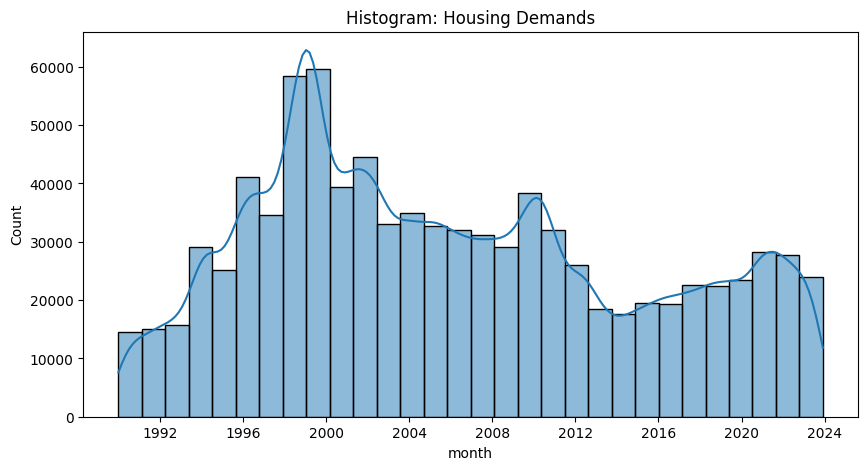

In [ ]:
fig, ax = plt.subplots(figsize=(10,5))
plt.title('Histogram: Housing Demands')
sns.histplot(x = df_all['month'], kde = True, bins = 30)

**Observation in year**

It seems in the range of 1999 year the house flat book was in peak in singapore


I used Histogram to view the distribution on df['month']. By Histogram, we can find the central tendency too. Hence I used Histogram.

syntax: sns.histplot(x=df_all['month'], kde=True, bins=30)
in which kde = True means, kernel density is true, the line which fall on each bin is KDE which shows the probrability density of continous random variable

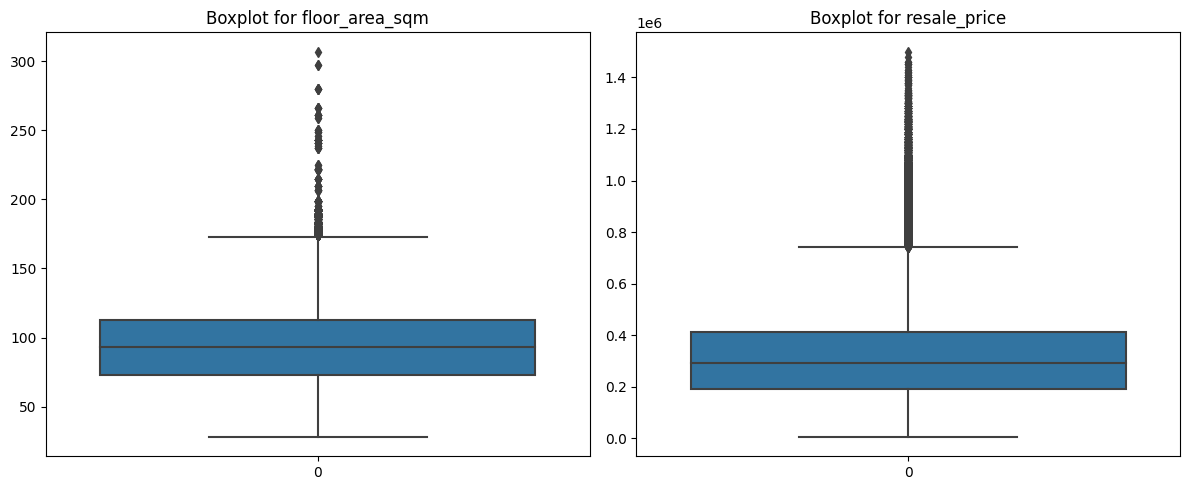

In [ ]:
# Create subplots
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 5))

# Plot for col1
# sns.boxplot(df['storey_range'], ax=axes[0])
# axes[0].set_title(f'Boxplot for {"storey_range"}')

# Plot for col2
sns.boxplot(df_all['floor_area_sqm'], ax=axes[0])
axes[0].set_title(f'Boxplot for {"floor_area_sqm"}')

# # Plot for col3
# sns.boxplot(df_all['lease_commence_date'], ax=axes[1])
# axes[1].set_title(f'Boxplot for {"lease_commence_date"}')

# Plot for col4
sns.boxplot(df_all['resale_price'], ax=axes[1])
axes[1].set_title(f'Boxplot for {"resale_price"}')

# # Plot for col5
# sns.boxplot(df_all['lease_remain_years'], ax=axes[3])
# axes[3].set_title(f'Boxplot for {"lease_remain_years"}')

# Adjust layout
plt.tight_layout()

# Show plots
plt.show()


#Usage of Boxplot boxplots are a versatile tool that can be applied to both numerical and categorical variables.
#They are particularly useful for visualizing the distribution, central tendency, and spread of data, as well as identifying outliers.

In [ ]:
q1 = df_all['floor_area_sqm'].quantile(0.25)
q3 = df_all['floor_area_sqm'].quantile(0.75)
iqr = q3-q1
low_bound = q1 - 1.5 * iqr
high_bound = q3 + 1.5 * iqr
outliers = (df_all['floor_area_sqm'] < low_bound ) | (df_all['floor_area_sqm'] > high_bound)
ls_out = df_all[outliers].index.tolist()
len(ls_out)


2382

In [ ]:
def remove_outliers(df, column):
  q1 = df_all[column].quantile(0.25)
  q3 = df_all[column].quantile(0.75)
  iqr = q3-q1
  low_bound = q1 - 1.5 * iqr
  high_bound = q3 + 1.5 * iqr
  outliers = (df_all[column] < low_bound ) | (df_all[column] > high_bound)
  ls_out = df_all[outliers].index.tolist()
  # print(len(ls_out))
  df_all.drop(ls_out, inplace = True)

In [ ]:
remove_outliers(df_all, 'floor_area_sqm')
# remove_outliers(df, 'lease_commence_date')
remove_outliers(df_all, 'resale_price')
# remove_outliers(df, 'lease_remain_years')


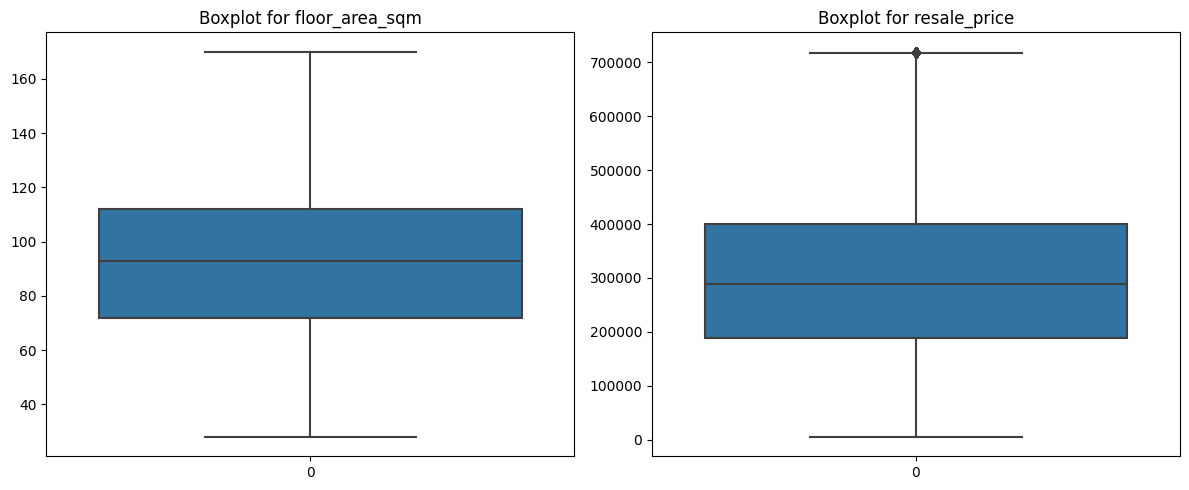

In [ ]:
# Create subplots
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 5))

# Plot for col1
# sns.boxplot(df['storey_range'], ax=axes[0])
# axes[0].set_title(f'Boxplot for {"storey_range"}')

# Plot for col2
sns.boxplot(df_all['floor_area_sqm'], ax=axes[0])
axes[0].set_title(f'Boxplot for {"floor_area_sqm"}')

# # Plot for col3
# sns.boxplot(df_all['lease_commence_date'], ax=axes[1])
# axes[1].set_title(f'Boxplot for {"lease_commence_date"}')

# Plot for col4
sns.boxplot(df_all['resale_price'], ax=axes[1])
axes[1].set_title(f'Boxplot for {"resale_price"}')

# # Plot for col5
# sns.boxplot(df_all['lease_remain_years'], ax=axes[3])
# axes[3].set_title(f'Boxplot for {"lease_remain_years"}')

# Adjust layout
plt.tight_layout()

# Show plots
plt.show()

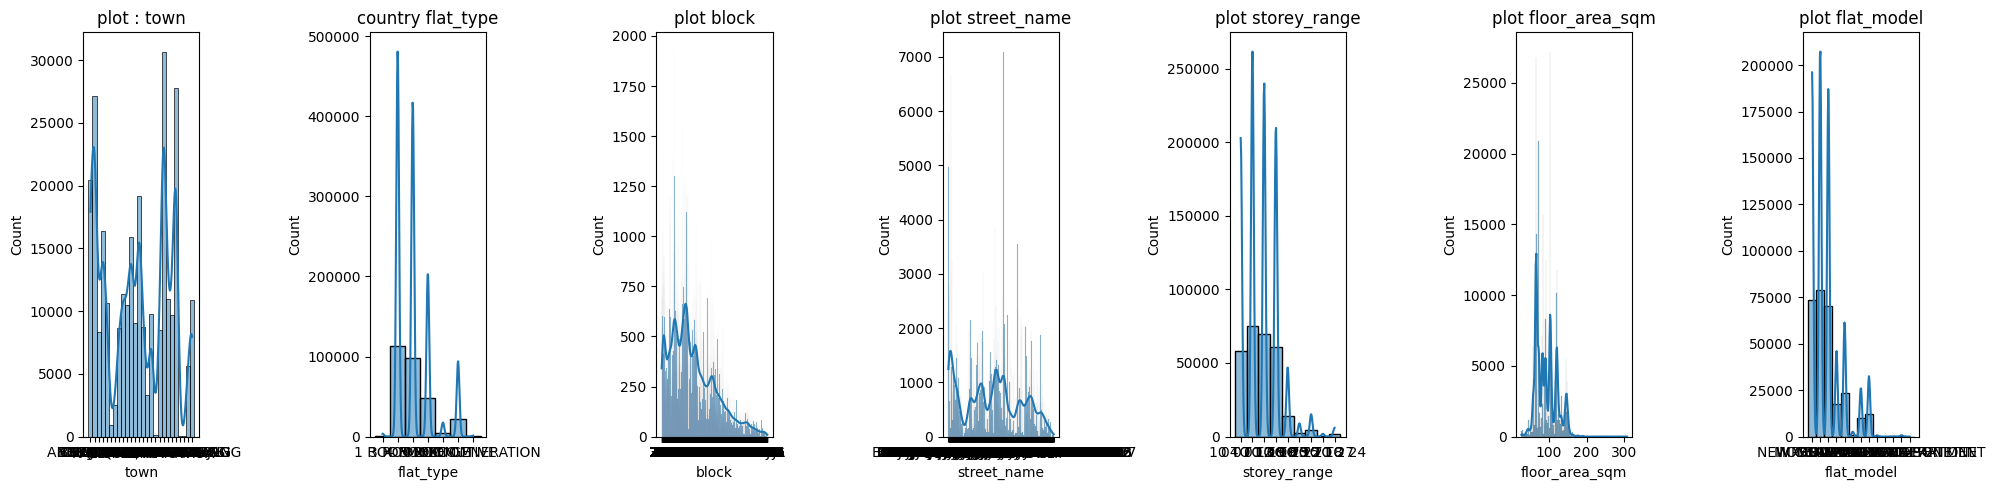

In [ ]:
##### Viualize the data before correcting the skewness

 #Create subplots
fig, axes = plt.subplots(1, 7, figsize=(20, 5))

# Plot 1: Histogram
sns.histplot(df['town'], kde=True, ax=axes[0])
axes[0].set_title('plot : town')

# Plot 2:
sns.histplot(df['flat_type'], kde=True, ax=axes[1])
axes[1].set_title('country flat_type')

# Plot 3:
sns.histplot(df['block'], kde=True, ax=axes[2])
axes[2].set_title('plot block')

# Plot 3:
sns.histplot(df['street_name'], kde=True, ax=axes[3])
axes[3].set_title('plot street_name')

# Plot 4:
sns.histplot(df['storey_range'], kde=True, ax=axes[4])
axes[4].set_title('plot storey_range')

# Plot 5:
sns.histplot(df['floor_area_sqm'], kde=True, ax=axes[5])
axes[5].set_title('plot floor_area_sqm')

# Plot 6:
sns.histplot(df['flat_model'], kde=True, ax=axes[6])
axes[6].set_title('plot flat_model')

# Adjust layout
plt.tight_layout()

# Show plots
plt.show()

# Feature selection for model



In [ ]:
#rename columns for better understandability:

df_all.rename(columns = {'month':'transaction_month'}, inplace = True)
# df_all['lease_commence_date']=pd.to_datetime(df_all['lease_commence_date']).dt.year

In [ ]:
df_all['end_of_lease']=pd.to_datetime(df_all['end_of_lease']).dt.year

In [ ]:
df_all['transaction_year']=pd.to_datetime(df_all['transaction_month']).dt.year

In [ ]:
df_all['transaction_month']=pd.to_datetime(df_all['transaction_month']).dt.month

In [ ]:
df_all

,transaction_month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,resale_price,end_of_lease,transaction_year,min_storey,max_storey
0,1,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,10 TO 12,31.0,IMPROVED,1977,9000.0,2076,1990,10,12
1,1,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,04 TO 06,31.0,IMPROVED,1977,6000.0,2076,1990,4,6
2,1,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,10 TO 12,31.0,IMPROVED,1977,8000.0,2076,1990,10,12
3,1,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,07 TO 09,31.0,IMPROVED,1977,6000.0,2076,1990,7,9
4,1,ANG MO KIO,3 ROOM,216,ANG MO KIO AVE 1,04 TO 06,73.0,NEW GENERATION,1976,47200.0,2075,1990,4,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
914063,12,YISHUN,5 ROOM,317A,YISHUN AVE 9,07 TO 09,112.0,IMPROVED,2015,680000.0,2114,2023,7,9
914064,12,YISHUN,5 ROOM,317A,YISHUN AVE 9,04 TO 06,112.0,IMPROVED,2015,675000.0,2114,2023,4,6
914065,12,YISHUN,5 ROOM,386,YISHUN RING RD,07 TO 09,122.0,IMPROVED,1988,640000.0,2087,2023,7,9
914066,12,YISHUN,5 ROOM,310,YISHUN RING RD,04 TO 06,123.0,IMPROVED,1995,625000.0,2094,2023,4,6


In [ ]:
df_all['storey_range']

0         10 TO 12
1         04 TO 06
2         10 TO 12
3         07 TO 09
4         04 TO 06
            ...   
914063    07 TO 09
914064    04 TO 06
914065    07 TO 09
914066    04 TO 06
914067    13 TO 15
Name: storey_range, Length: 889825, dtype: object

In [ ]:
df_all[['min_storey', 'max_storey']] = df_all['storey_range'].str.split(' TO ', expand = True)

In [ ]:
df_all['min_storey'] = pd.to_numeric(df_all['min_storey'])
df_all['max_storey'] = pd.to_numeric(df_all['max_storey'])

In [ ]:
df_all.drop(columns = 'storey_range', axis= 1, inplace = True)

In [ ]:
df_all.head()

,transaction_month,town,flat_type,block,street_name,floor_area_sqm,flat_model,lease_commence_date,resale_price,end_of_lease,transaction_year,min_storey,max_storey
0,1,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,31.0,IMPROVED,1977,9000.0,2076,1990,10,12
1,1,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,31.0,IMPROVED,1977,6000.0,2076,1990,4,6
2,1,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,31.0,IMPROVED,1977,8000.0,2076,1990,10,12
3,1,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,31.0,IMPROVED,1977,6000.0,2076,1990,7,9
4,1,ANG MO KIO,3 ROOM,216,ANG MO KIO AVE 1,73.0,NEW GENERATION,1976,47200.0,2075,1990,4,6


In [ ]:
import seaborn as sns

<ipython-input-225-6c5dc733e378>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df_all.corr(), annot = True)


<Axes: >

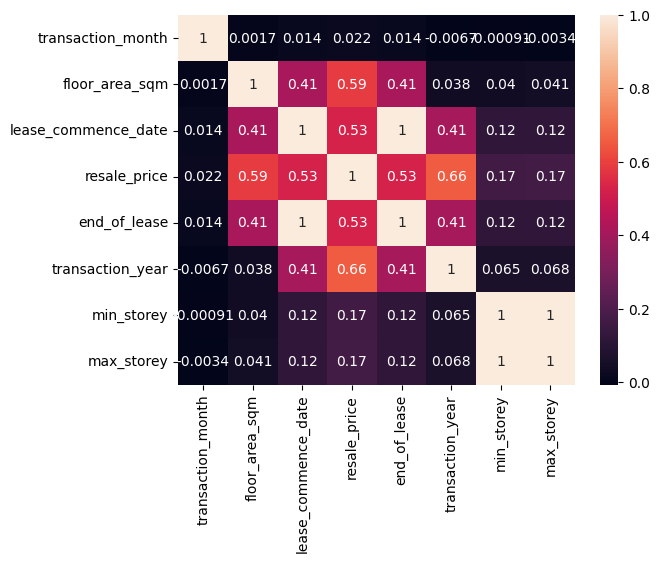

In [ ]:
sns.heatmap(df_all.corr(), annot = True)

In [ ]:
df_all.dtypes

transaction_month        int64
town                    object
flat_type               object
block                   object
street_name             object
storey_range            object
floor_area_sqm         float64
flat_model              object
lease_commence_date      int64
resale_price           float64
end_of_lease             int64
transaction_year         int64
min_storey              object
max_storey              object
dtype: object

In [ ]:
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import LabelEncoder

# hence even the order for categorical values in order but there is no meaning in order, I used Label Encoder technique to encoding the categorical columns.
# for example, see the Flat Model, the values are like Improved, New Generation, 'MODEL A and so On there is interconnection with these variables, hence I used Label encoding.
# Label encoding suitable for machine learning algorithms like decision trees, random forests, and gradient boosting
# as all the values can be directly implemented to models, it is suitable for those algorithms, without converting into values and then implement

In [ ]:
#converting catergorical columns data to continous columns flat_type, storey_range & flat_model

In [ ]:
categorical_columns = ['town', 'flat_type', 'block', 'street_name', 'flat_model']

In [ ]:
from sklearn.preprocessing import LabelEncoder
import pandas as pd

# categorical_columns = ['town', 'flat_type', 'block', 'street_name', 'flat_model']

# # Assuming df_all is your DataFrame
# df_encoded = df_all.copy()  # Make a copy to keep the original DataFrame unchanged

# for column in categorical_columns:
#     le = LabelEncoder()
#     df_encoded[column] = le.fit_transform(df_all[column])


In [ ]:
categorical_columns = ['town', 'flat_type', 'block', 'street_name', 'flat_model']

# Create a dictionary to store unique values before and after encoding
unique_values_dict = {}

for column in categorical_columns:
    # Store unique values before encoding
    unique_values_dict[f'{column}_before'] = df_all[column].unique().tolist()

    # Perform ordinal encoding
    le = LabelEncoder()
    df_all[column] = le.fit_transform(df_all[[column]])

    # Store unique values after encoding
    unique_values_dict[f'{column}_after'] = df_all[column].unique().tolist()

# Now unique_values_dict contains unique values before and after ordinal encoding
unique_values_dict

In [ ]:
# from sklearn.preprocessing import LabelEncoder

# # Original 'flat_model' categories
# original_flat_model_categories = [
#     'IMPROVED', 'MODEL A, A2 & MODEL A-MAISONETTE', 'NEW GENERATION',
#     'STANDARD & SIMPLIFIED', 'MODEL A & MODEL A-MAISONETTE', 'Premium Apartment',
#     'Apartment', 'Standard', 'Maisonette', 'Others', 'DBSS', 'Adjoined flat',
#     'Model A-Maisonette', 'Type S1, S2', 'Terrace', 'Multi Generation'
# ]

# # Create an instance of LabelEncoder
# label_encoder = LabelEncoder()

# # Fit the encoder on the original categories and transform them
# label_encoded_values = label_encoder.fit_transform(original_flat_model_categories)

# # Create a mapping between original categories and label-encoded values
# label_encoding_mapping = dict(zip(original_flat_model_categories, label_encoded_values))

# # Print the mapping
# label_encoding_mapping

In [ ]:
# # Specify categorical column names for label encoding
# column_names = ['town', 'flat_type', 'block', 'street_name', 'flat_model']

# # Dictionary to store unique values before and after label encoding
# unique_value ={}
# for col_name in column_names:
#     data = df1[col_name].unique()
#     data.sort()

#     df1[col_name] = enc.fit_transform(df1[[col_name]])

#     globals()[col_name] = {}
#     for i in df1[col_name].unique():
#         globals()[col_name][data[int(i)]] = i
#         unique_value[f'{col_name}'] = globals()[col_name]
#     # print(globals()[col_name])
# unique_value

In [ ]:
import json
# Write the unique_value dictionary to a JSON file with proper indentation
with open('Category_Columns_Encoded_Data.json', 'w') as file:
    json.dump(unique_values_dict, file , indent = 4)

In [ ]:
df_all.to_json('Category_Columns_Encoded_Data000.json', orient='records', lines=True, date_format='iso')

In [ ]:
df_all.dtypes

transaction_month        int64
town                     int64
flat_type                int64
block                    int64
street_name              int64
floor_area_sqm         float64
flat_model               int64
lease_commence_date      int64
resale_price           float64
end_of_lease             int64
transaction_year         int64
min_storey               int64
max_storey               int64
dtype: object

In [ ]:
X = df_all.drop(columns = 'resale_price', axis = 1)
y = df_all['resale_price']

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [ ]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.ensemble import GradientBoostingRegressor
from lightgbm import LGBMRegressor
from xgboost import XGBRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.model_selection import train_test_split

# Assuming you have X and y from your dataset
X = df_all.drop(columns = 'resale_price', axis = 1)
y = df_all['resale_price']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# List of models
models = {
    'DecisionTreeRegressor': DecisionTreeRegressor(),
    'LinearRegression': LinearRegression(),
    'LGBMRegressor': LGBMRegressor(),
    'XGBRegressor': XGBRegressor(),
    'GradientBoostingRegressor': GradientBoostingRegressor(),
    'KNeighborsRegressor': KNeighborsRegressor()
}


# Loop through models and evaluate R2 score
for model_name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    r2 = r2_score(y_test, y_pred)
    MSE = mean_squared_error(y_test, y_pred)
    MAE = mean_absolute_error(y_test, y_pred)
    print(f'{model_name}: R2 Score = {r2:.4f}')
    print(f'{model_name}: MSE Score = {MSE:.4f}')
    print(f'{model_name}: MAE Score = {MAE:.4f}')

DecisionTreeRegressor: R2 Score = 0.9653
DecisionTreeRegressor: MSE Score = 747628703.8739
DecisionTreeRegressor: MAE Score = 18480.6682
LinearRegression: R2 Score = 0.7730
LinearRegression: MSE Score = 4889133418.7187
LinearRegression: MAE Score = 53453.3466
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.133829 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 898
[LightGBM] [Info] Number of data points in the train set: 711860, number of used features: 12
[LightGBM] [Info] Start training from score 303713.755379
LGBMRegressor: R2 Score = 0.9626
LGBMRegressor: MSE Score = 804421305.3169
LGBMRegressor: MAE Score = 20206.0259
XGBRegressor: R2 Score = 0.9773
XGBRegressor: MSE Score = 488552467.1045
XGBRegressor: MAE Score = 15877.4481
GradientBoostingRegressor: R2 Score = 0.9139
GradientBoostingRegressor: MSE Score = 1853904494.9340
GradientBoostingRegressor: MAE Score = 30380.4927
KNeighborsRegressor:

As XGBRegressor: R2 Score = 0.9773,

In [ ]:
from xgboost import XGBRegressor

In [ ]:
XGR= XGBRegressor().fit(X_train, y_train)

In [ ]:
# Get the training score (R^2)
train_score = XGR.score(X_train, y_train)

# Get the test score (R^2)
y_pred_test = XGR.predict(X_test)
test_score = r2_score(y_test, y_pred_test)

print(f'Training Score (R2): {train_score:.4f}')
print(f'Test Score (R2): {test_score:.4f}')

Training Score (R2): 0.9780
Test Score (R2): 0.9773


**Observation & conclusion**

While comparing to other models, XGBRegressor training and testing score falls on 0.97, so it does not falls under overfitting or underfitting issues.

In [ ]:
import pickle

In [ ]:
with open('XGR.pkl', 'wb') as f:
    pickle.dump(XGR, f)

In [ ]:
with open('XGR.pkl', 'rb') as f:
  xg = pickle.load(f)

In [ ]:
df_all.head(2)

,transaction_month,town,flat_type,block,street_name,floor_area_sqm,flat_model,lease_commence_date,resale_price,end_of_lease,transaction_year,min_storey,max_storey
0,1,0,0,823,13,31.0,3,1977,9000.0,2076,1990,10,12
1,1,0,0,823,13,31.0,3,1977,6000.0,2076,1990,4,6


In [ ]:
test_data = [[date.month, town, flat_type, block, street_name, floor_area_sqm, flat_model, lease_commence_date,
            end_of_lease, date.year, min_storey, max_storey]]


In [ ]:
import numpy as np

In [ ]:
data = np.array([[1,0,0,823,13,31.0,3,1977,2076,1900,10,12]])
print('Resale Price $', xg.predict(data)[0]**2)

Resale Price $ 9208365.090185404


In [ ]:
import json

with open(r'/content/Category_Columns_Encoded_Data.json', 'r') as f:
  data = json.load(f)

In [ ]:
import sklearn

In [ ]:
print(sklearn.__version__)

1.2.2
